In [288]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import eugene as eu

In [289]:
import matplotlib as mpl
mpl.rcParams["pdf.fonttype"] = 42

In [290]:
import sys
sys.path.append("/cellar/users/aklie/projects/use_cases/king20/")
from utils import *

In [291]:
dataset_dir = "/cellar/users/aklie/data/eugene/"

# Synthetic sequences

In [292]:
eu.settings.logging_dir = "/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/SYN"
eu.settings.output_dir = "/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/SYN"
eu.settings.figure_dir = "/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/SYN"

In [293]:
sdata = eu.dl.read_h5sd(os.path.join(dataset_dir, "king20", "SYN.h5sd"))
sdata

SeqData object with = 624 seqs
seqs = (624,)
names = (624,)
rev_seqs = None
ohe_seqs = (624, 4, 80)
ohe_rev_seqs = None
seqs_annot: 'CRE_normalized_mean', 'Class', 'E_presence', 'Element_id_simplified', 'K_presence', 'O_presence', 'Position.1_E', 'Position.1_K', 'Position.1_O', 'Position.1_S', 'Position.2_E', 'Position.2_K', 'Position.2_O', 'Position.2_S', 'Position.3_E', 'Position.3_K', 'Position.3_O', 'Position.3_S', 'Position.4_E', 'Position.4_K', 'Position.4_O', 'Position.4_S', 'S_presence', 'log_CRE_normalized_mean', 'seq_len', 'train_val'
pos_annot: None
seqsm: None
uns: None

## Independent model

In [294]:
model_type = "random_forest"
model_features = "independent"

In [295]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=13)

In [296]:
feature_cols = sdata.seqs_annot.columns[sdata.seqs_annot.columns.str.contains("presence")]
sdata.seqsm[model_features] = sdata.seqs_annot[feature_cols].values

In [297]:
eu.external.sklearn.fit(
    model,
    sdata,
    target_keys = "log_CRE_normalized_mean",
    train_key = "train_val",
    seqsm_key = model_features,
    name = model_type,
    version = model_features,
    seed=13
)

Dropping 0 sequences with NaN targets.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [298]:
# Save best sklearn model as pickle -- need to make this part of fit function
pickle.dump(model, open(os.path.join(eu.settings.logging_dir, model_type, model_features, "model.pkl"), "wb"))

In [299]:
eu.external.sklearn.predictions(
    model,
    sdata,
    target_keys = "log_CRE_normalized_mean",
    seqsm_key = model_features,
    file_label = "SYN",
    probability=False,
    store_only=True
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Group R2 MSE Pearsonr Spearmanr
2mer 0.06325573679026686 0.11162327658743537 0.6196637553588799
3mer 0.42439359908246954 0.15821356407463968 0.5738116283273632
4mer -0.014461701750829503 0.2668039721675039 nan


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


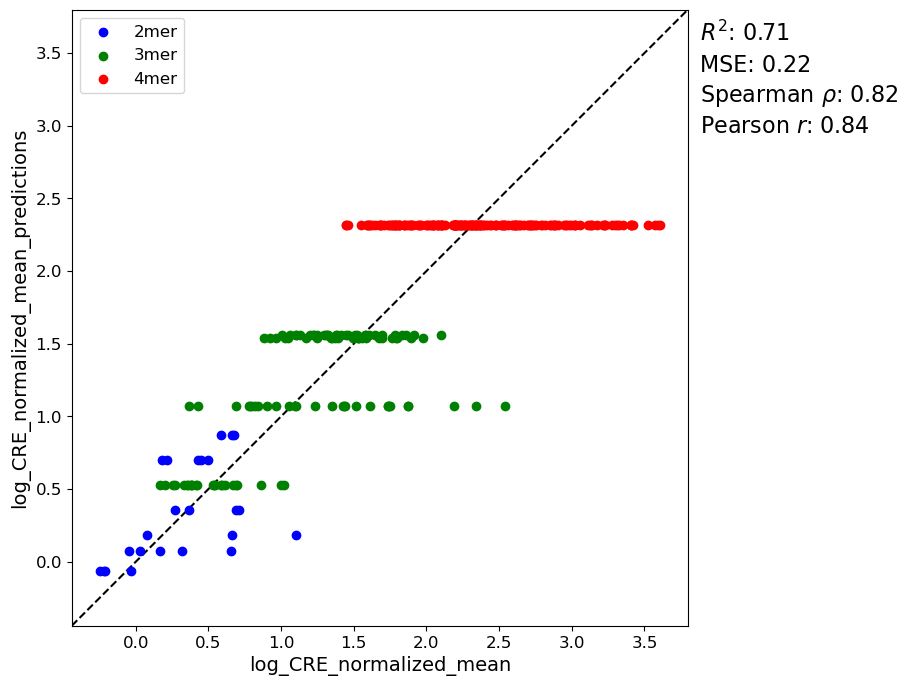

In [300]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
eu.pl.performance_scatter(
    sdata,
    target_keys="log_CRE_normalized_mean",
    prediction_keys="log_CRE_normalized_mean_predictions",
    seq_idx=val_idx,
    groupby="Class",
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf")
)

## Independent and position RF regressor

In [301]:
model_type = "random_forest"
model_features = "independent_position"

In [302]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=13)

In [303]:
feature_cols = sdata.seqs_annot.columns[sdata.seqs_annot.columns.str.contains("presence|Position")]
sdata.seqsm[model_features] = sdata.seqs_annot[feature_cols].values

In [304]:
eu.external.sklearn.fit(
    model,
    sdata,
    target_keys = "log_CRE_normalized_mean",
    train_key = "train_val",
    seqsm_key = model_features,
    name = model_type,
    version = model_features,
    seed=13
)

Dropping 0 sequences with NaN targets.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [305]:
# Save best sklearn model as pickle -- need to make this part of fit function
pickle.dump(model, open(os.path.join(eu.settings.logging_dir, model_type, model_features, "model.pkl"), "wb"))

In [306]:
eu.external.sklearn.predictions(
    model,
    sdata,
    target_keys = "log_CRE_normalized_mean",
    seqsm_key = model_features,
    file_label = "SYN",
    probability=False,
    store_only=True
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Group R2 MSE Pearsonr Spearmanr
2mer 0.16795442879689904 0.09914728765940668 0.5473634553720202
3mer 0.5737113394444859 0.11717147030259524 0.7343716769483164
4mer 0.5764634718931543 0.11139033426487625 0.7527458403771544


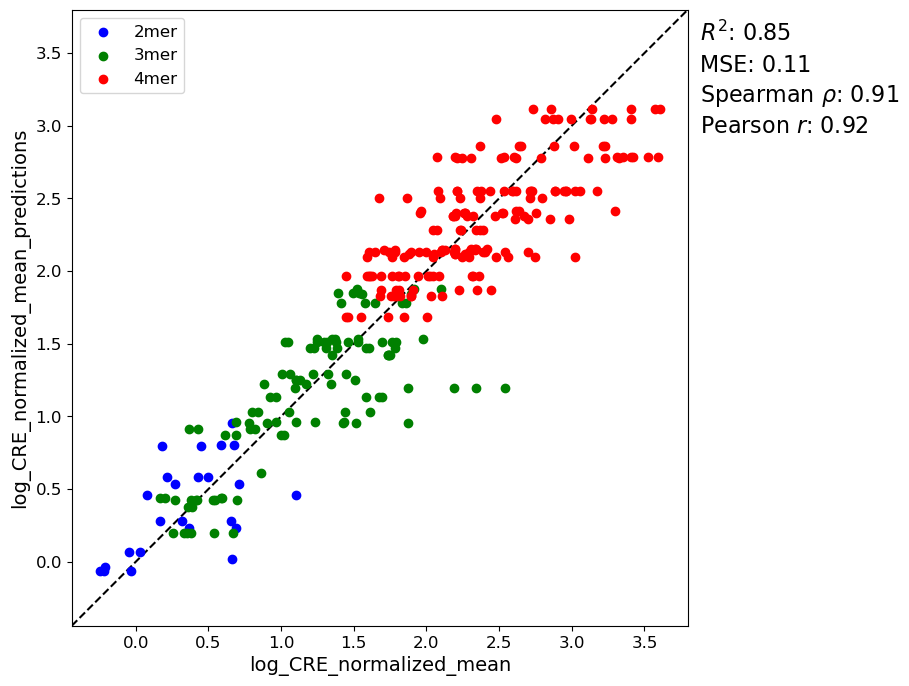

In [307]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
eu.pl.performance_scatter(
    sdata,
    target_keys="log_CRE_normalized_mean",
    prediction_keys="log_CRE_normalized_mean_predictions",
    seq_idx=val_idx,
    groupby="Class",
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf")
)

## CNN

In [126]:
model_type = "cnn"
model_features = "ohe"

In [108]:
cnn = eu.models.CNN(
    input_len=80,
    output_dim=1,
    conv_kwargs={
        "conv_channels": [32],
        "conv_kernels": [8]
    }
)

In [109]:
eu.models.init_weights(cnn)

In [110]:
eu.train.fit(
    model=cnn,
    sdata=sdata,
    target_keys="log_CRE_normalized_mean",
    train_key="train_val",
    epochs=100,
    gpus=None,
    batch_size=32,
    name=model_type,
    version=model_features
)

Global seed set to 13
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Set SLURM handle signals.

  | Name         | Type        | Params
---------------------------------------------
0 | train_metric | R2Score     | 0     
1 | val_metric   | R2Score     | 0     
2 | test_metric  | R2Score     | 0     
3 | conv1d_tower | Conv1DTower | 1.1 K 
4 | dense_block  | DenseBlock  | 2.3 K 
---------------------------------------------
3.4 K     Trainable params
0         Non-trainable params
3.4 K     Total params
0.014     Total estimated model params size (MB)


Dropping 0 sequences with NaN targets.
No transforms given, assuming just need to tensorize.
No transforms given, assuming just need to tensorize.


Validation sanity check: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Global seed set to 13
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/cellar/users/aklie/opt/minicond

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

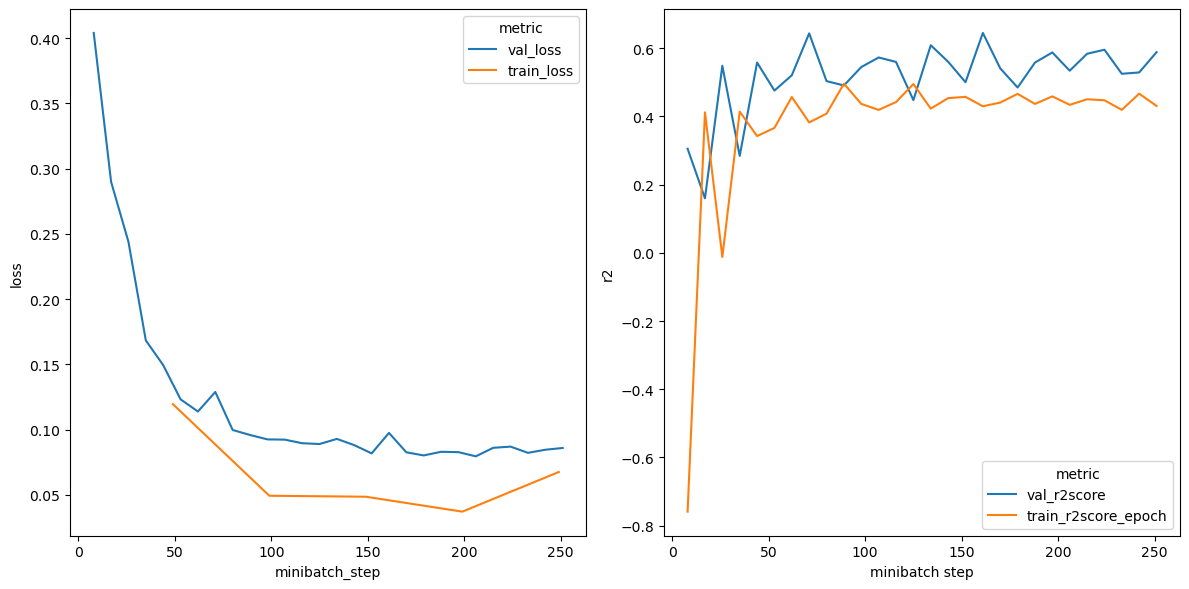

In [111]:
eu.pl.training_summary(os.path.join(eu.settings.logging_dir, model_type, model_features))

In [130]:
best_cnn = eu.models.CNN.load_from_checkpoint(
    glob.glob(os.path.join(eu.settings.logging_dir, model_type, model_features, "checkpoints", "*"))[0]
)

In [131]:
eu.evaluate.predictions(
    best_cnn,
    sdata,
    target_keys="log_CRE_normalized_mean",
    gpus=None,
    batch_size=32,
    store_only=True
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)
/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)


Group R2 MSE Pearsonr Spearmanr
2mer 0.12458016516306758 0.10431580335416628 0.5139130434782608
3mer 0.6822822254346381 0.0873292260192409 0.8088128685906856
4mer 0.706712224889158 0.07713484230374819 0.8235511815340755


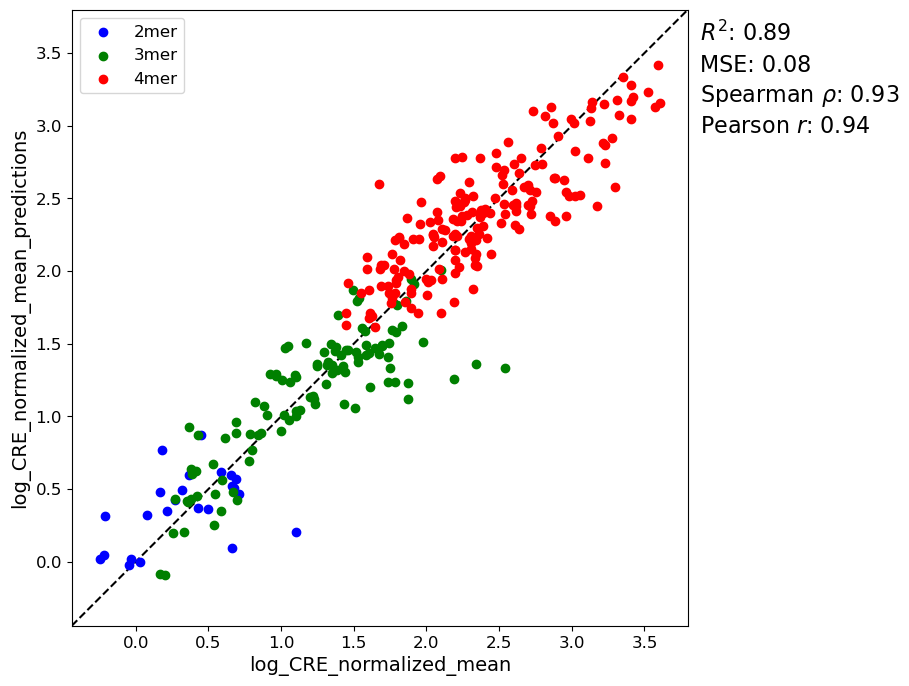

In [133]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
eu.pl.performance_scatter(
    sdata,
    target_keys="log_CRE_normalized_mean",
    prediction_keys="log_CRE_normalized_mean_predictions",
    seq_idx=val_idx,
    groupby="Class",
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf")
)

## RNN

In [134]:
model_type = "rnn"
model_features = "ohe"

In [116]:
rnn = eu.models.RNN(
    input_len=80,
    output_dim=1,
    recurrent_kwargs={
        "hidden_dim" : 32
    }
)

In [118]:
eu.models.init_weights(rnn)

In [120]:
eu.train.fit(
    model=rnn,
    sdata=sdata,
    target_keys="log_CRE_normalized_mean",
    train_key="train_val",
    epochs=100,
    gpus=None,
    batch_size=32,
    name=model_type,
    version=model_features,
    transform_kwargs={"transpose": True}
)

Global seed set to 13
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Set SLURM handle signals.

  | Name            | Type           | Params
---------------------------------------------------
0 | train_metric    | R2Score        | 0     
1 | val_metric      | R2Score        | 0     
2 | test_metric     | R2Score        | 0     
3 | recurrent_block | RecurrentBlock | 4.9 K 
4 | dense_block     | DenseBlock     | 33    
---------------------------------------------------
4.9 K     Trainable params
0         Non-trainable params
4.9 K     Total params
0.020     Total estimated model params size (MB)


Dropping 0 sequences with NaN targets.
No transforms given, assuming just need to tensorize.
No transforms given, assuming just need to tensorize.


Validation sanity check: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Global seed set to 13
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/cellar/users/aklie/opt/minicond

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

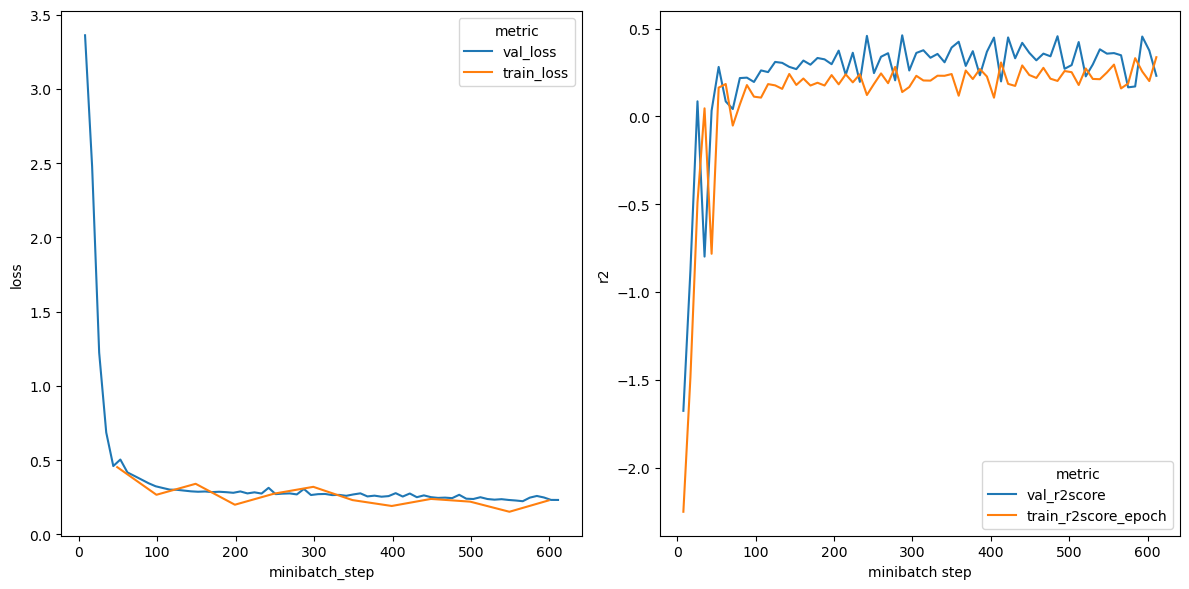

In [121]:
eu.pl.training_summary(os.path.join(eu.settings.logging_dir, model_type, model_features))

In [139]:
best_rnn = eu.models.RNN.load_from_checkpoint(
    glob.glob(os.path.join(eu.settings.logging_dir, model_type, model_features, "checkpoints", "*"))[0]
)

In [140]:
eu.evaluate.predictions(
    best_rnn,
    sdata,
    target_keys="log_CRE_normalized_mean",
    gpus=None,
    batch_size=32,
    store_only=True,
    transform_kwargs={"transpose": True}
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)
/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)


Group R2 MSE Pearsonr Spearmanr
2mer 0.0541564813655685 0.11270755192799693 0.6704347826086956
3mer 0.22254107403372492 0.21369558678064318 0.4684261055271459
4mer 0.12679475625820147 0.2296534478785362 0.42843631778058017


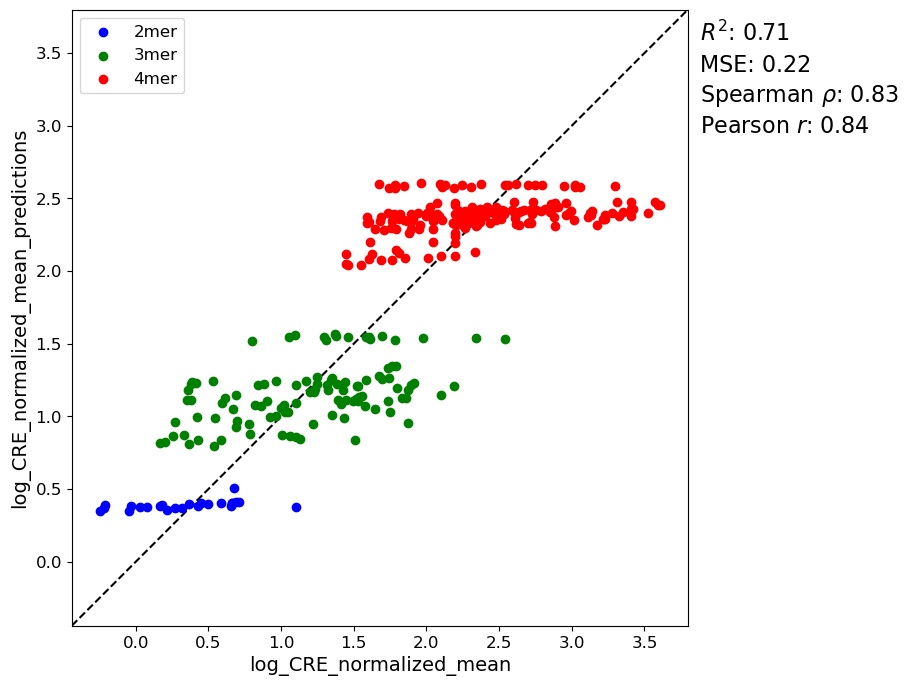

In [141]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
eu.pl.performance_scatter(
    sdata,
    target_keys="log_CRE_normalized_mean",
    prediction_keys="log_CRE_normalized_mean_predictions",
    seq_idx=val_idx,
    groupby="Class",
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf")
)

# Genomic sequences

In [223]:
eu.settings.logging_dir = "/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN"
eu.settings.output_dir = "/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN"
eu.settings.figure_dir = "/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN"

In [224]:
sdata = eu.dl.read_h5sd(os.path.join(dataset_dir, "king20", "GEN.h5sd"))
sdata

SeqData object with = 810 seqs
seqs = (810,)
names = (810,)
rev_seqs = None
ohe_seqs = (810, 4, 82)
ohe_rev_seqs = None
seqs_annot: 'CRE_norm_expression_WT_all', 'log_CRE_norm_expression_WT_all', 'range', 'seq_len', 'top_25', 'train_val'
pos_annot: None
seqsm: None
uns: None

In [201]:
#sdata.seqs_annot["Class"] = [row[-1] for row in sdata.seqs_annot.index.str.split("_", 1)]
#sdata["Class"].value_counts()

In [202]:
#sdata_genomic = sdata[sdata["Class"] == "Genomic"]
#sdata_genomic["train_val"].value_counts()

## CNN regressor

In [191]:
model_type = "cnn"
model_features = "ohe"

In [192]:
cnn = eu.models.CNN(
    input_len=82,
    output_dim=1,
    conv_kwargs={
        "conv_channels": [32],
        "conv_kernels": [8]
    }
)

In [193]:
eu.models.init_weights(cnn)

In [194]:
eu.train.fit(
    model=cnn,
    sdata=sdata_genomic,
    target_keys="log_CRE_norm_expression_WT_all",
    train_key="train_val",
    epochs=100,
    gpus=None,
    batch_size=32,
    name=model_type,
    version=model_features
)

Global seed set to 13
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Set SLURM handle signals.

  | Name         | Type        | Params
---------------------------------------------
0 | train_metric | R2Score     | 0     
1 | val_metric   | R2Score     | 0     
2 | test_metric  | R2Score     | 0     
3 | conv1d_tower | Conv1DTower | 1.1 K 
4 | dense_block  | DenseBlock  | 2.4 K 
---------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Dropping 0 sequences with NaN targets.
No transforms given, assuming just need to tensorize.
No transforms given, assuming just need to tensorize.


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/cnn/ohe/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Global seed set to 13
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/cellar/users/aklie/opt/minicond

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

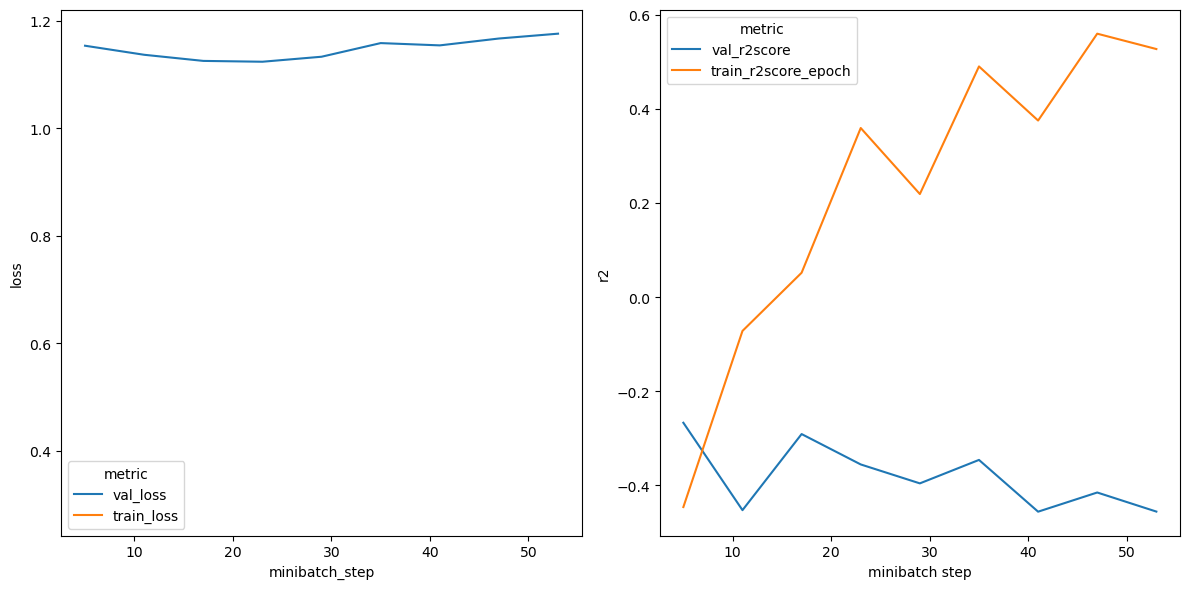

In [195]:
eu.pl.training_summary(os.path.join(eu.settings.logging_dir, model_type, model_features))

In [196]:
best_cnn = eu.models.CNN.load_from_checkpoint(
    glob.glob(os.path.join(eu.settings.logging_dir, model_type, model_features, "checkpoints", "*"))[0]
)

In [197]:
eu.evaluate.predictions(
    best_cnn,
    sdata_genomic,
    target_keys="log_CRE_norm_expression_WT_all",
    gpus=None,
    batch_size=32,
    store_only=True
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + log_CRE_norm_expression_WT_all_predictions


/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)
/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([19, 1])) that is different to the input size (torch.Size([19])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)


Group R2 MSE Pearsonr Spearmanr
Genomic -0.22412847806887815 1.110351739430649 0.043386260566505394


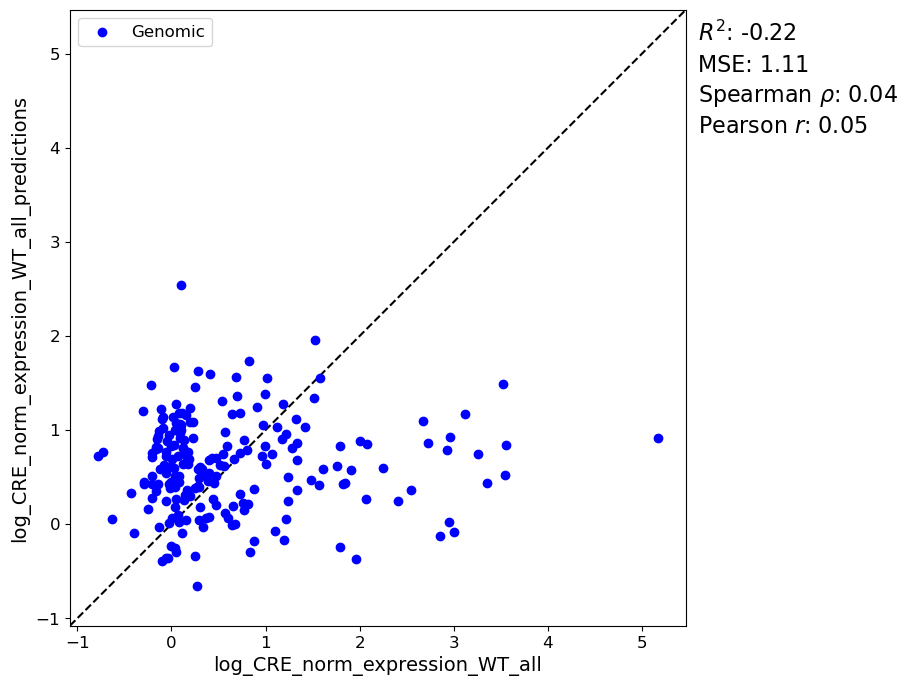

In [198]:
val_idx = np.where(sdata_genomic.seqs_annot["train_val"] == False)[0]
eu.pl.performance_scatter(
    sdata_genomic,
    target_keys="log_CRE_norm_expression_WT_all",
    prediction_keys="log_CRE_norm_expression_WT_all_predictions",
    seq_idx=val_idx,
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf"),
    groupby="Class"
)

## CNN - classifier

In [225]:
model_type = "cnn-clf"
model_features = "ohe"

In [226]:
cnn = eu.models.CNN(
    input_len=82,
    output_dim=1,
    conv_kwargs={
        "conv_channels": [32],
        "conv_kernels": [8]
    },
    task="binary_classification"
)

In [227]:
eu.models.init_weights(cnn)

In [228]:
sdata

SeqData object with = 810 seqs
seqs = (810,)
names = (810,)
rev_seqs = None
ohe_seqs = (810, 4, 82)
ohe_rev_seqs = None
seqs_annot: 'CRE_norm_expression_WT_all', 'log_CRE_norm_expression_WT_all', 'range', 'seq_len', 'top_25', 'train_val'
pos_annot: None
seqsm: None
uns: None

In [229]:
eu.train.fit(
    model=cnn,
    sdata=sdata,
    target_keys="top_25",
    train_key="train_val",
    epochs=100,
    gpus=None,
    batch_size=32,
    name=model_type,
    version=model_features
)

Global seed set to 13
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Set SLURM handle signals.

  | Name         | Type        | Params
---------------------------------------------
0 | train_metric | AUROC       | 0     
1 | val_metric   | AUROC       | 0     
2 | test_metric  | AUROC       | 0     
3 | conv1d_tower | Conv1DTower | 1.1 K 
4 | dense_block  | DenseBlock  | 2.4 K 
---------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Dropping 0 sequences with NaN targets.
No transforms given, assuming just need to tensorize.
No transforms given, assuming just need to tensorize.


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/cnn-clf/ohe/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
Global seed set to 13
/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
/cellar/users/aklie/opt/minicond

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

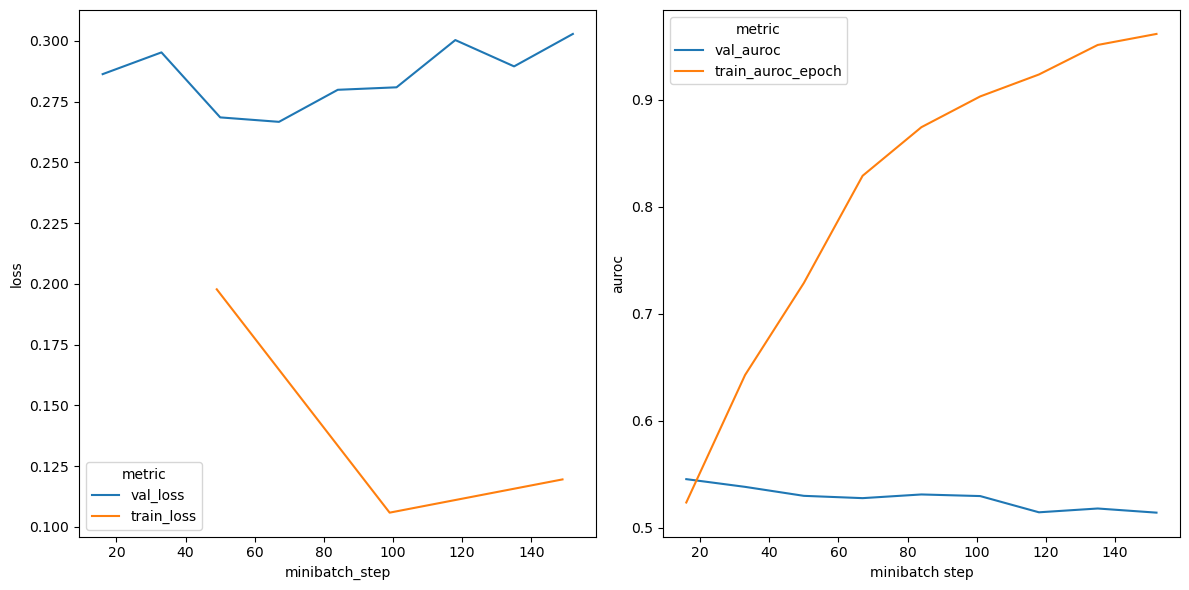

In [230]:
eu.pl.training_summary(os.path.join(eu.settings.logging_dir, model_type, model_features), metric="auroc")

In [231]:
best_cnn = eu.models.CNN.load_from_checkpoint(
    glob.glob(os.path.join(eu.settings.logging_dir, model_type, model_features, "checkpoints", "*"))[0]
)

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [232]:
eu.evaluate.predictions(
    best_cnn,
    sdata,
    target_keys="top_25",
    gpus=None,
    batch_size=32,
    store_only=True
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


No transforms given, assuming just need to tensorize.


/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pytorch_lightning/trainer/data_loading.py:133: UserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Predicting: 0it [00:00, ?it/s]

SeqData object modified:
    seqs_annot:
        + top_25_predictions


/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)
/cellar/users/aklie/projects/EUGENe/eugene/models/base/_base_models.py:172: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = self.loss_fxn(outs, y)


<AxesSubplot:xlabel='False Positive Rate', ylabel='True Positive Rate'>

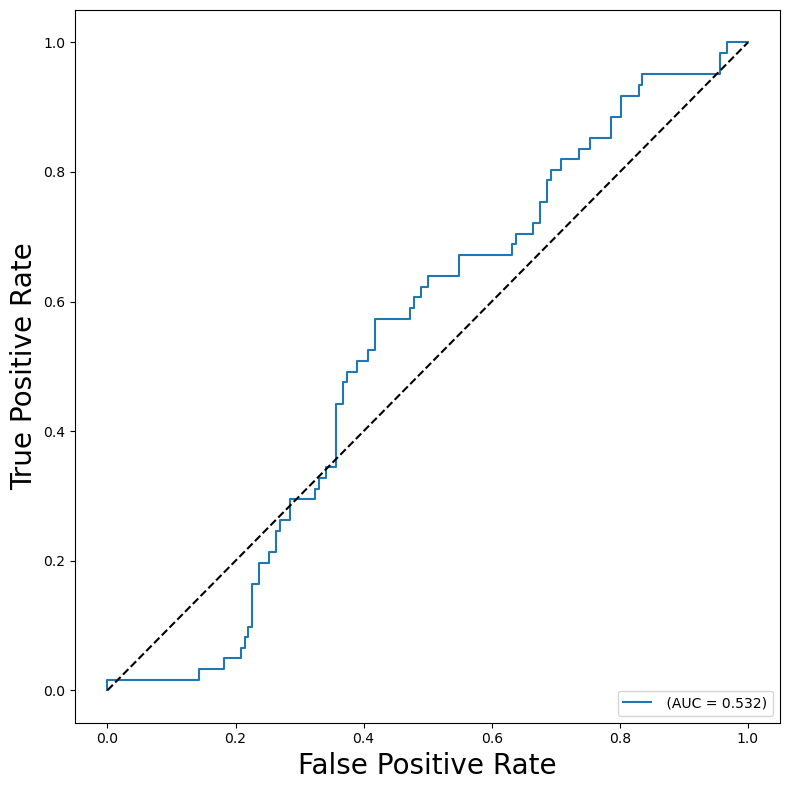

In [233]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
sdata_val = sdata[val_idx]
eu.pl.auroc(
    sdata_val,
    target_keys="top_25",
    prediction_keys="top_25_predictions",
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf"),
)

## gkmSVM - classifier

In [279]:
sdata = eu.dl.read_h5sd(os.path.join(dataset_dir, "king20", "GEN_gkm_svm.h5sd"))
sdata

SeqData object with = 202 seqs
seqs = (202,)
names = (202,)
rev_seqs = None
ohe_seqs = (202, 4, 82)
ohe_rev_seqs = None
seqs_annot: 'CRE_norm_expression_WT_all', 'Class', 'log_CRE_norm_expression_WT_all', 'range', 'seq_len', 'top_25', 'train_val'
pos_annot: None
seqsm: None
uns: None

In [280]:
eu.external.gkm_svm.fit(
    sdata,
    target_key = "log_CRE_norm_expression_WT_all",
    train_key = "train_val",
    data_dir=os.path.join(dataset_dir, "king20", "fasta"),
    log_dir=os.path.join(eu.settings.logging_dir, "gkm_svm", "clf"),
    name="GEN",
    word_length=8,
    informative_columns=6,
    mismatches=0
)

Train files already exist, skipping generation
Fitting model
Model fit, log file saved to /cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/gkm_svm/clf/GEN_fit.log


In [281]:
eu.external.gkm_svm.predict(
    model="GEN",
    sdata=sdata,
    file_names=["GEN.fasta"],
    data_dir=os.path.join(dataset_dir, "king20", "fasta"),
    log_dir=os.path.join(eu.settings.logging_dir, "gkm_svm", "clf"),
    out_dir=os.path.join(eu.settings.logging_dir, "gkm_svm", "clf"),
    file_label="GEN"
)

/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/gkm_svm/clf/GEN.model.txt
here
Predictions saved to /cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/gkm_svm/clf/GEN_predictions.txt


<AxesSubplot:xlabel='False Positive Rate', ylabel='True Positive Rate'>

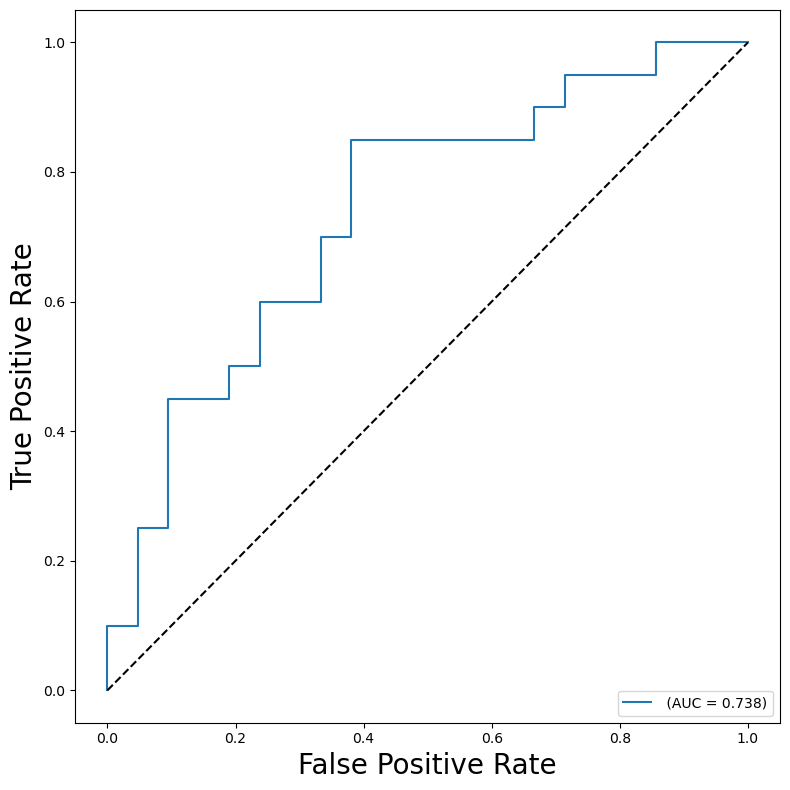

In [282]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
sdata_val = sdata[val_idx]
eu.pl.auroc(
    sdata_val,
    target_keys="top_25",
    prediction_keys="GEN_gkm_svm_predictions",
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf"),
)

## gkmSVM - regression

In [283]:
eu.external.gkm_svm.fit(
    sdata,
    target_key = "log_CRE_norm_expression_WT_all",
    train_key = "train_val",
    task = "regression",
    data_dir=os.path.join(dataset_dir, "king20", "fasta"),
    log_dir=os.path.join(eu.settings.logging_dir, "gkm_svm", "reg"),
    name="GEN",
    word_length=8,
    informative_columns=6,
    mismatches=0
)

Train files already exist, skipping generation
Fitting model
Model fit, log file saved to /cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/gkm_svm/reg/GEN_fit.log


In [284]:
eu.external.gkm_svm.predict(
    model="GEN",
    sdata=sdata,
    file_names=["GEN.fasta"],
    data_dir=os.path.join(dataset_dir, "king20", "fasta"),
    log_dir=os.path.join(eu.settings.logging_dir, "gkm_svm", "reg"),
    out_dir=os.path.join(eu.settings.logging_dir, "gkm_svm", "reg"),
    file_label="GEN"
)

/cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/gkm_svm/reg/GEN.model.txt
here
Predictions saved to /cellar/users/aklie/projects/ML4GLand/use_cases/king20/models/GEN/gkm_svm/reg/GEN_predictions.txt


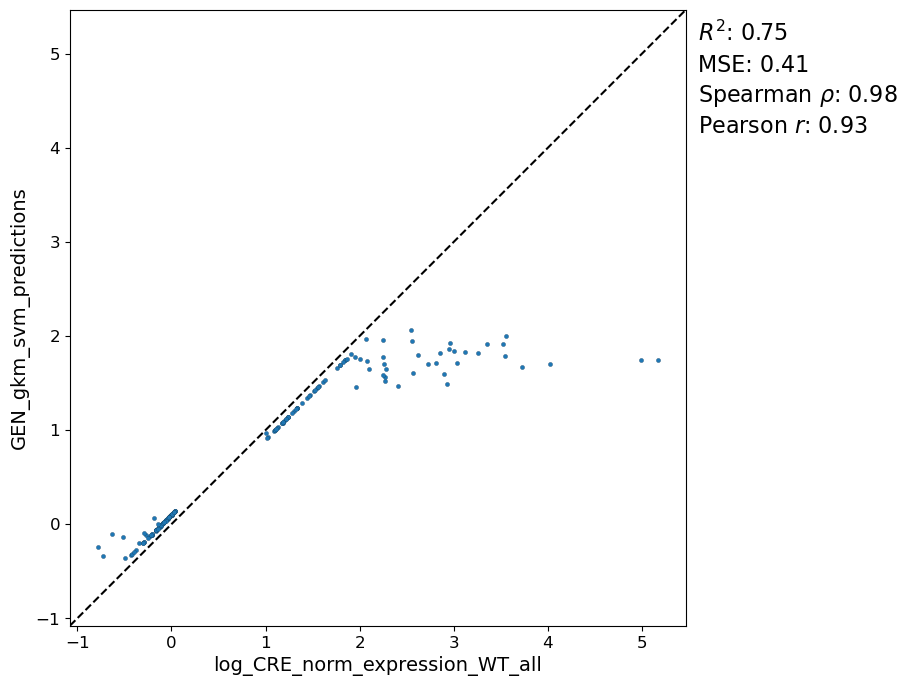

In [287]:
train_idx = np.where(sdata.seqs_annot["train_val"] == True)[0]
eu.pl.performance_scatter(
    sdata,
    target_keys="log_CRE_norm_expression_WT_all",
    prediction_keys="GEN_gkm_svm_predictions",
    seq_idx=train_idx,
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf")
)

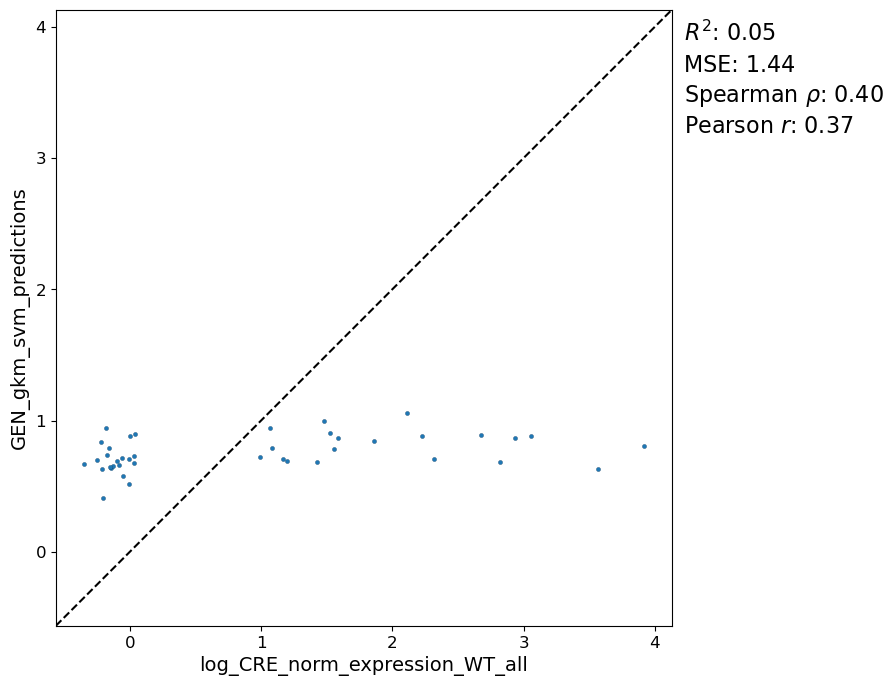

In [286]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
eu.pl.performance_scatter(
    sdata,
    target_keys="log_CRE_norm_expression_WT_all",
    prediction_keys="GEN_gkm_svm_predictions",
    seq_idx=val_idx,
    save=os.path.join(eu.settings.figure_dir, model_type, model_features, "val_performance.pdf")
)

# DONE!

---